In [ ]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.x(0) # "x" is a "not" gate. It flips the value. Starting value is a 0, so this flips to a 1. 
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

In [3]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

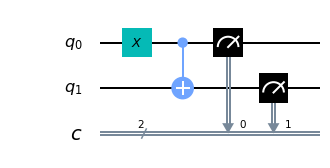

In [4]:
circuit.draw(output="mpl")  # matplotlib-based visualization.

In [5]:
from qiskit import IBMQ

IBMQ.save_account(open("token.txt","r").read())

In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 2 queued and 5 qubits
ibmq_16_melbourne has 13 queued and 15 qubits
ibmq_vigo has 13 queued and 5 qubits
ibmq_ourense has 7 queued and 5 qubits
ibmq_london has 6 queued and 5 qubits
ibmq_burlington has 4 queued and 5 qubits
ibmq_essex has 2 queued and 5 qubits
ibmq_armonk has 1 queued and 1 qubits
ibmq_rome has 2 queued and 5 qubits


In [9]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmqx2")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


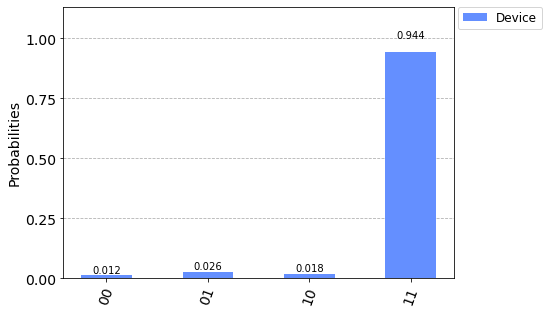

In [10]:
from qiskit.visualization import plot_histogram
from matplotlib import style

#style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [11]:
circuit = q.QuantumCircuit(2,2)  # 2 qbits, 2 classical bits.
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

In [12]:
backend = provider.get_backend("ibmqx2")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


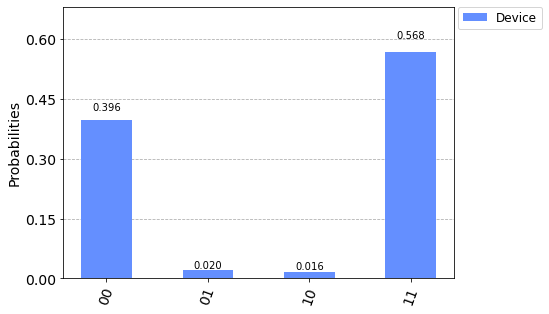

In [13]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [14]:
from qiskit import Aer  # simulator framework from qiskit

# will create a statevector of possibilities. 
sim_backend = Aer.get_backend('qasm_simulator')

In [15]:
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [16]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


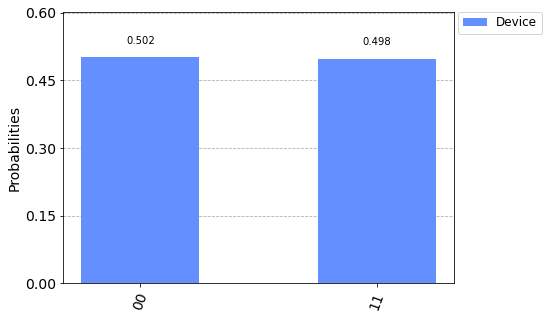

In [17]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [18]:
circuit = q.QuantumCircuit(3,3)  # 2 qbits, 2 classical bits.
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition
circuit.cx(0, 1)#cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.ccx(0, 1, 2)
circuit.measure([0,1,2], [0,1,2])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

In [19]:
sim_backend = Aer.get_backend('qasm_simulator')
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


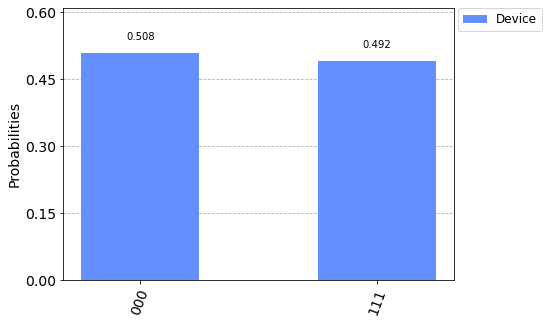

In [20]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [21]:
circuit.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■────■──┤M├──────
     └───┘┌─┴─┐  │  └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c_0: ════════════════╩══╬══╬═
                        ║  ║ 
c_1: ═══════════════════╩══╬═
                           ║ 
c_2: ══════════════════════╩═

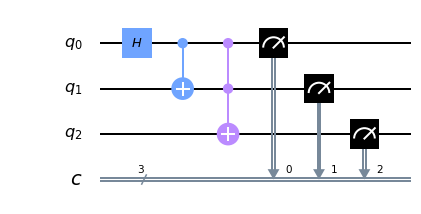

In [22]:
circuit.draw(output="mpl")

In [23]:
circuit = q.QuantumCircuit(3,3)  # 2 qbits, 2 classical bits.
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition
circuit.h(1)#cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.ccx(0,1,2)
circuit.measure([0,1,2], [0,1,2])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

In [24]:
circuit.draw()

┌───┐     ┌─┐      
q_0: ┤ H ├──■──┤M├──────
     ├───┤  │  └╥┘┌─┐   
q_1: ┤ H ├──■───╫─┤M├───
     └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ─────┤ X ├─╫──╫─┤M├
          └───┘ ║  ║ └╥┘
c_0: ═══════════╩══╬══╬═
                   ║  ║ 
c_1: ══════════════╩══╬═
                      ║ 
c_2: ═════════════════╩═

In [25]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


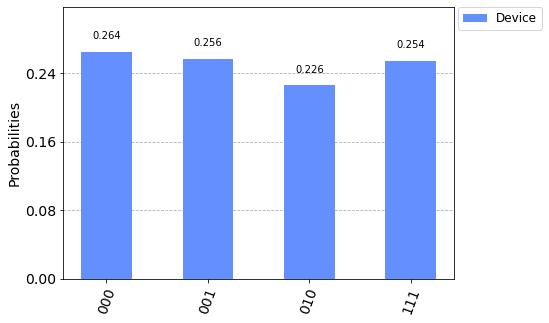

In [26]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

In [29]:
circuit = q.QuantumCircuit(3,3)  # 2 qbits, 2 classical bits.
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition
circuit.cx(0,1)#cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.ccx(0,1,2)
circuit.cx(2,0)
circuit.measure([0,1,2], [0,1,2])

In [30]:
circuit.draw()

┌───┐          ┌───┐   ┌─┐   
q_0: ┤ H ├──■────■──┤ X ├───┤M├───
     └───┘┌─┴─┐  │  └─┬─┘┌─┐└╥┘   
q_1: ─────┤ X ├──■────┼──┤M├─╫────
          └───┘┌─┴─┐  │  └╥┘ ║ ┌─┐
q_2: ──────────┤ X ├──■───╫──╫─┤M├
               └───┘      ║  ║ └╥┘
c_0: ═════════════════════╬══╩══╬═
                          ║     ║ 
c_1: ═════════════════════╩═════╬═
                                ║ 
c_2: ═══════════════════════════╩═

In [31]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


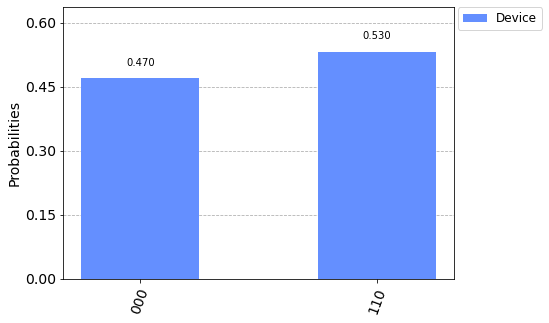

In [32]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])